In [15]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np

In [16]:
# use this one
def simulate_engine(throttle, air_temperature, air_pressure, engine_speed, fuel_air_ratio, displacement):
    # Constants for calculation
    R = 287.05  # Specific gas constant for air (J/(kg·K))
    n_cylinders = 4
    stroke_length = 0.045  # Stroke length in meters for Honda D16-A
    bore = 0.075  # Bore diameter in meters for Honda D16-A
    compression_ratio = 10.0  # Compression ratio for Honda D16-A

    # Calculate mass of air per cycle (kg)
    V_cylinder = (displacement / n_cylinders) / (stroke_length * 2)  # Volume of one cylinder (m^3)
    V_air = throttle * V_cylinder * (engine_speed / 60)  # Volume of air intake per second (m^3/s)
    mass_air_per_cycle = (air_pressure * V_air) / (R * (air_temperature + 273.15))  # Mass of air per cycle (kg)

    # Calculate fuel burned per cycle (kg)
    fuel_burned_per_cycle = mass_air_per_cycle / fuel_air_ratio

    # Calculate fuel burned per 4 strokes (kg)
    fuel_burned_per_4_strokes = fuel_burned_per_cycle * 2  # Only one of every two rotations burns fuel

    # Calculate a factor to impact torque based on fuel burned per cycle
    # You may adjust this formula as per your discretion
    torque_factor = 1 + (fuel_burned_per_cycle * 0.01)

    # Calculate torque (Nm) quadratically based on engine_speed
    if engine_speed <= 3500:
        torque = 200 + ((engine_speed / 3500) ** 2) * 200 * torque_factor
        torque /= 3
    else:
        torque = 400 - (((engine_speed - 3500) / 3100) ** 2) * 300 * torque_factor
        torque /= 3

    # Calculate horsepower (HP) as torque times RPM
    HP = torque * engine_speed / (5252)  # 1 horsepower = 5252 RPM

    return HP, torque, fuel_burned_per_4_strokes


In [17]:
"""

def simulate_engine(air_temperature, air_pressure, engine_speed, fuel_air_ratio, displacement):
    # Constants for calculation
    R = 287.05  # Specific gas constant for air (J/(kg·K))
    n_cylinders = 4
    stroke_length = 0.045  # Stroke length in meters for Honda D16-A
    bore = 0.075  # Bore diameter in meters for Honda D16-A
    compression_ratio = 10.0  # Compression ratio for Honda D16-A

    # Calculate mass of air per cycle (kg)
    V_cylinder = (displacement / n_cylinders) / (stroke_length * 2)  # Volume of one cylinder (m^3)
    V_air = V_cylinder * (engine_speed / 60)  # Volume of air intake per second (m^3/s)
    mass_air_per_cycle = (air_pressure * V_air) / (R * (air_temperature + 273.15))  # Mass of air per cycle (kg)
    print(mass_air_per_cycle)

    # Calculate fuel burned per cycle (kg)
    fuel_burned_per_cycle = mass_air_per_cycle / fuel_air_ratio

    # Calculate fuel burned per 4 strokes (kg)
    fuel_burned_per_4_strokes = fuel_burned_per_cycle * 2  # Only one of every two rotations burns fuel

    # Calculate horsepower
    Vd = displacement / n_cylinders
    HP = (engine_speed * Vd * (1 / 2) * 1 / (fuel_air_ratio)) * 1.28

    # Calculate torque (Nm)
    torque = (HP * 7000) / engine_speed

    return HP, torque, fuel_burned_per_4_strokes

# Example usage
air_temperature = 25  # in Celsius
air_pressure = 101.3  # in kPa
engine_speed = 5000  # in RPM
fuel_air_ratio = 14.7  # fuel_air_ratio
displacement = 1.6  # in liters

HP, torque, fuel_burned = simulate_engine(air_temperature, air_pressure, engine_speed, fuel_air_ratio, displacement)
print("Horsepower:", HP)
print("Torque:", torque)
print("Fuel burned per 4 strokes:", fuel_burned, "mL")
"""

'\n\ndef simulate_engine(air_temperature, air_pressure, engine_speed, fuel_air_ratio, displacement):\n    # Constants for calculation\n    R = 287.05  # Specific gas constant for air (J/(kg·K))\n    n_cylinders = 4\n    stroke_length = 0.045  # Stroke length in meters for Honda D16-A\n    bore = 0.075  # Bore diameter in meters for Honda D16-A\n    compression_ratio = 10.0  # Compression ratio for Honda D16-A\n\n    # Calculate mass of air per cycle (kg)\n    V_cylinder = (displacement / n_cylinders) / (stroke_length * 2)  # Volume of one cylinder (m^3)\n    V_air = V_cylinder * (engine_speed / 60)  # Volume of air intake per second (m^3/s)\n    mass_air_per_cycle = (air_pressure * V_air) / (R * (air_temperature + 273.15))  # Mass of air per cycle (kg)\n    print(mass_air_per_cycle)\n\n    # Calculate fuel burned per cycle (kg)\n    fuel_burned_per_cycle = mass_air_per_cycle / fuel_air_ratio\n\n    # Calculate fuel burned per 4 strokes (kg)\n    fuel_burned_per_4_strokes = fuel_burned_

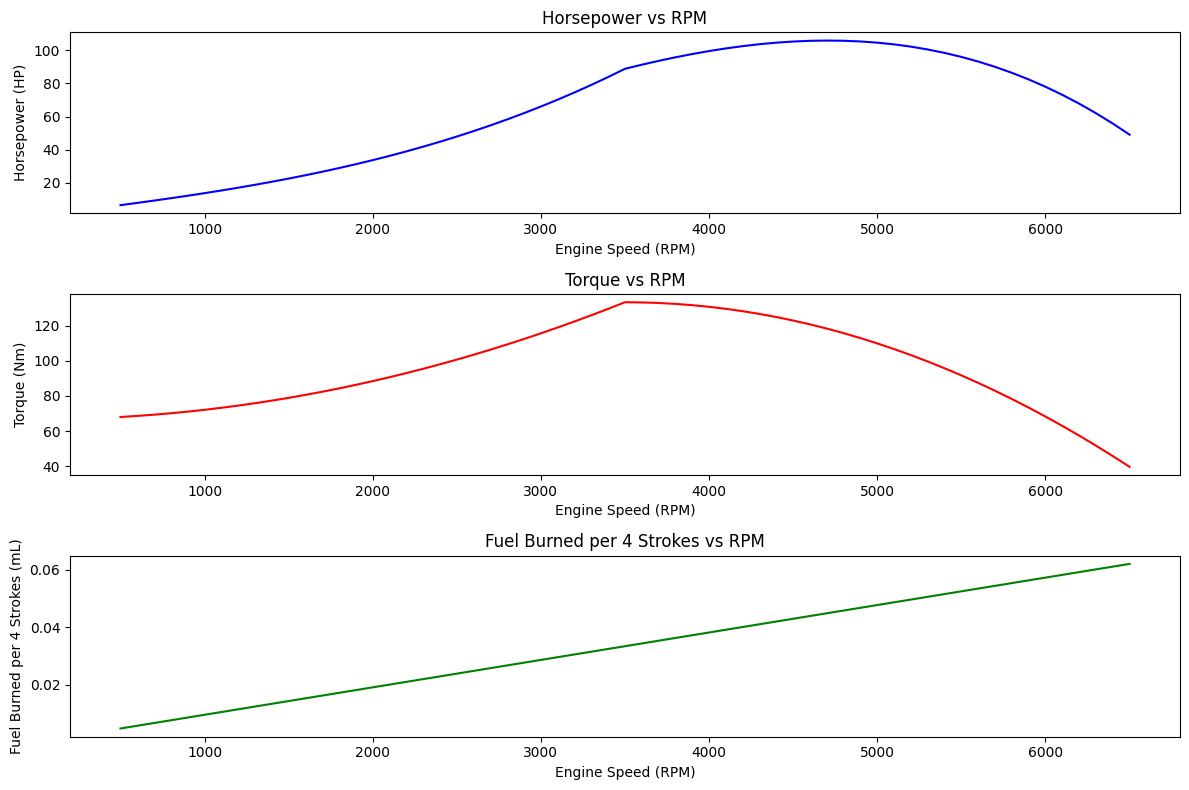

In [18]:
# Define parameters
air_temperature = 25  # in Celsius
air_pressure = 101.3  # in kPa
fuel_air_ratio = 14.7  # fuel_air_ratio
displacement = 1.6  # in liters
throttle = 0.8

# Sweep RPM from 0 to 6600 with intervals of 100
rpm_values = range(500, 6600, 100)

# Initialize lists to store results
horsepower_values = []
torque_values = []
fuel_burned_values = []

# Run the function for each RPM value
for rpm in rpm_values:
    # Calculate engine performance
    HP, torque, fuel_burned = simulate_engine(throttle, air_temperature, air_pressure, rpm, fuel_air_ratio, displacement)

    # Store results
    horsepower_values.append(HP)
    torque_values.append(torque)
    fuel_burned_values.append(fuel_burned)

# Create plots
plt.figure(figsize=(12, 8))

# Plot 1: HP vs RPM
plt.subplot(3, 1, 1)
plt.plot(rpm_values, horsepower_values, color='blue')
plt.title('Horsepower vs RPM')
plt.xlabel('Engine Speed (RPM)')
plt.ylabel('Horsepower (HP)')

# Plot 2: Torque vs RPM
plt.subplot(3, 1, 2)
plt.plot(rpm_values, torque_values, color='red')
plt.title('Torque vs RPM')
plt.xlabel('Engine Speed (RPM)')
plt.ylabel('Torque (Nm)')

# Plot 3: Fuel burned per 4 strokes vs RPM
plt.subplot(3, 1, 3)
plt.plot(rpm_values, fuel_burned_values, color='green')
plt.title('Fuel Burned per 4 Strokes vs RPM')
plt.xlabel('Engine Speed (RPM)')
plt.ylabel('Fuel Burned per 4 Strokes (mL)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [19]:
# Define the neural network model
class ThrottleModel(nn.Module):
    def __init__(self):
        super(ThrottleModel, self).__init__()
        self.fc1 = nn.Linear(3, 5)  # Input layer: 3 neurons, Hidden layer: 5 neurons
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(5, 1)  # Hidden layer: 5 neurons, Output layer: 1 neuron

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.sigmoid(x)  # Apply sigmoid activation function for throttle input (constrained between 0 and 1)

# Initialize the model
model = ThrottleModel()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)


# Training loop
losses = []
loss_arr = []
for j in range(250):
    if j<=10:
        print("Iteration", j+1)
    # Generate input data
    air_temperature = random.uniform(20, 30)
    air_pressure = random.uniform(50, 105)
    rpm = random.randint(500, 7000)
    if j<=10:
        print("Air Temperature (C):", air_temperature)
        print("Air Pressure (kPa):", air_pressure)
        print("Engine Speed (RPM):", rpm)
    for i in range(500):
        # Normalize inputs (optional)
        norm_air_temperature = (air_temperature - 20) / 10  # Normalize to range [0, 1]
        norm_air_pressure = (air_pressure - 50) / 55  # Normalize to range [0, 1]
        norm_rpm = (rpm - 500) / 6500  # Normalize to range [0, 1]

        # Convert to PyTorch tensors
        inputs = torch.tensor([norm_air_temperature, norm_air_pressure, norm_rpm], dtype=torch.float32)

        # Fixed fuel air ratio
        fuel_air_ratio = 14.7

        # Forward pass
        predicted_throttle = model(inputs.unsqueeze(0))  # Adding batch dimension

        # Run simulate_engine() with the predicted throttle input
        HP, torque, fuel_burn = simulate_engine(predicted_throttle.item(), air_temperature, air_pressure, rpm, fuel_air_ratio, displacement=1.6)
        predicted_torque_per_ml = torque/fuel_burn

        # Calculate negative torque ratio (since we're minimizing this value)
        # Note: Adding a small epsilon value to avoid division by zero
        negative_torque_ratio = -1 / (predicted_torque_per_ml + 1e-6)

        # Calculate loss as negative torque ratio
        loss = torch.tensor(negative_torque_ratio, dtype=torch.float32, requires_grad=True)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        if i % 100 == 0 and j<10:
            print(f"Iteration {i}, Loss: {loss.item()}")
        losses.append(loss.item())
    loss_arr.append(losses.copy())
    losses.clear()

# Once training is done, you can use the trained model to make predictions


Iteration 1
Air Temperature (C): 21.876280808397755
Air Pressure (kPa): 81.20903459587527
Engine Speed (RPM): 4493
Iteration 0, Loss: -0.00021737314818892628
Iteration 100, Loss: -0.00021737314818892628
Iteration 200, Loss: -0.00021737314818892628
Iteration 300, Loss: -0.00021737314818892628
Iteration 400, Loss: -0.00021737314818892628
Iteration 2
Air Temperature (C): 21.176457300212196
Air Pressure (kPa): 89.7745244062147
Engine Speed (RPM): 4413
Iteration 0, Loss: -0.0002341292565688491
Iteration 100, Loss: -0.0002341292565688491
Iteration 200, Loss: -0.0002341292565688491
Iteration 300, Loss: -0.0002341292565688491
Iteration 400, Loss: -0.0002341292565688491
Iteration 3
Air Temperature (C): 27.559401358929584
Air Pressure (kPa): 99.5386541165918
Engine Speed (RPM): 6221
Iteration 0, Loss: -0.0008052677731029689
Iteration 100, Loss: -0.0008052677731029689
Iteration 200, Loss: -0.0008052677731029689
Iteration 300, Loss: -0.0008052677731029689
Iteration 400, Loss: -0.000805267773102968

In [20]:
# After the training loop

# Generate new input data for prediction
new_air_temperature = 26
new_air_pressure = 103.15
new_rpm = 6000

# Normalize inputs (optional)
norm_new_air_temperature = (new_air_temperature - 20) / 10  # Normalize to range [0, 1]
norm_new_air_pressure = (new_air_pressure - 50) / 55  # Normalize to range [0, 1]
norm_new_rpm = (new_rpm - 500) / 6500  # Normalize to range [0, 1]

# Convert to PyTorch tensor
new_inputs = torch.tensor([norm_new_air_temperature, norm_new_air_pressure, norm_new_rpm], dtype=torch.float32)
print(new_inputs)

# Forward pass through the model
predicted_output = model(new_inputs.unsqueeze(0))  # Adding batch dimension

# Denormalize the output (if necessary)
# predicted_output = predicted_output.item()  # Convert tensor to scalar value
# denormalize_output = predicted_output * (max_torque_per_ml - min_torque_per_ml) + min_torque_per_ml  # Denormalize the output

# Print the predicted output
print("Predicted throttle input:", predicted_output.item())


tensor([0.6000, 0.9664, 0.8462])
Predicted throttle input: 0.6267997622489929


283.9773871898651
251.0704735815525


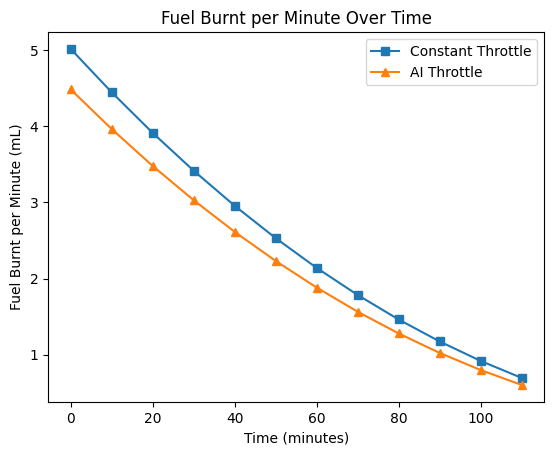

In [21]:
# Define simulation parameters
total_time_minutes = 120
start_rpm = 6000
end_rpm = 2000
start_temperature = 30
end_temperature = 25
start_pressure = 103.15
end_pressure = 95
fuel_air_ratio = 14.7
throttle_constant = 0.7

# Linearly decrease RPM, air temperature, and air pressure over time
rpm_values = torch.linspace(start_rpm, end_rpm, total_time_minutes)
temperature_values = torch.linspace(start_temperature, end_temperature, total_time_minutes)
pressure_values = torch.linspace(start_pressure, end_pressure, total_time_minutes)

# Initialize lists to record fuel burnt per minute for each simulation
fuel_burnt_constant_throttle = []
fuel_burnt_ai_throttle = []

# Simulation with constant throttle input
for i in range(total_time_minutes):
    HP, torque, fuel_burnt_per_cycle = simulate_engine(throttle_constant, temperature_values[i], pressure_values[i], rpm_values[i], fuel_air_ratio, displacement=1.6)
    fuel_burnt_per_minute = fuel_burnt_per_cycle * (rpm_values[i] / 60)  # Convert fuel burnt per 4 cycles to per minute
    fuel_burnt_constant_throttle.append(fuel_burnt_per_minute)

# Simulation with AI throttle input (assuming model is already trained and available)
for i in range(total_time_minutes):
    # Create input tensor for the model, normalize
    temp_inp = (temperature_values[i] - 20) / 10
    press_inp = (pressure_values[i] - 50) / 55
    rpm_inp = (rpm_values[i] - 500) / 6500
    input_tensor = torch.tensor([temp_inp, press_inp, rpm_inp], dtype=torch.float32)

    # Forward pass through the model to get predicted throttle
    predicted_throttle = model(input_tensor.unsqueeze(0))

    # Run simulate_engine() with the predicted throttle input
    HP, torque, fuel_burnt_per_cycle = simulate_engine(predicted_throttle.item(), temperature_values[i], pressure_values[i], rpm_values[i], fuel_air_ratio, displacement=1.6)
    fuel_burnt_per_minute = fuel_burnt_per_cycle * (rpm_values[i] / 60)  # Convert fuel burnt per 4 cycles to per minute
    fuel_burnt_ai_throttle.append(fuel_burnt_per_minute)

# Linearly interpolate fuel burnt values for constant throttle simulation
time_indices = np.linspace(0, total_time_minutes - 1, len(fuel_burnt_constant_throttle))
interpolated_fuel_burnt_constant_throttle = np.interp(range(total_time_minutes), time_indices, fuel_burnt_constant_throttle)

# Linearly interpolate fuel burnt values for AI throttle simulation
interpolated_fuel_burnt_ai_throttle = np.interp(range(total_time_minutes), time_indices, fuel_burnt_ai_throttle)

# Plot the trendlines of fuel burnt per minute for both simulations
print(sum([i.item() for i in interpolated_fuel_burnt_constant_throttle]))
print(sum([j.item() for j in interpolated_fuel_burnt_ai_throttle]))
interval = 10
plt.plot(range(0, total_time_minutes, interval), [i.item() for i in interpolated_fuel_burnt_constant_throttle][::interval], marker='s', label='Constant Throttle')
plt.plot(range(0, total_time_minutes, interval), [j.item() for j in interpolated_fuel_burnt_ai_throttle][::interval], marker='^', label='AI Throttle')
plt.xlabel('Time (minutes)')
plt.ylabel('Fuel Burnt per Minute (mL)')
plt.title('Fuel Burnt per Minute Over Time')
plt.legend()
plt.show()

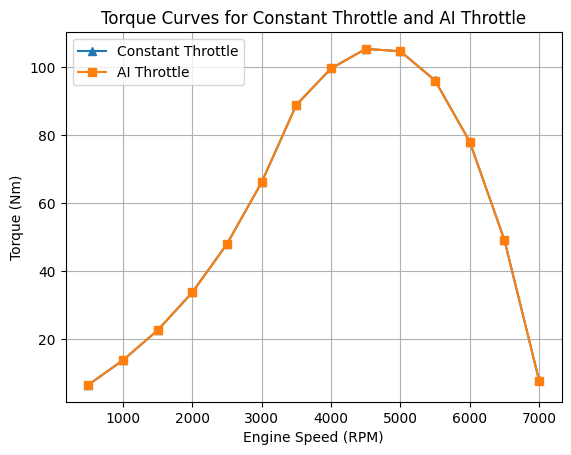

In [22]:
# Define simulation parameters
temperature = 30
pressure = 103.15
throttle_constant = 0.1
fuel_air_ratio=14.7

# Define the RPM range
rpm_range = np.arange(500, 7001, 500)

# Initialize lists to record torques for both constant throttle and AI throttle
torque_constant_throttle = []
torque_ai_throttle = []

# Simulation with constant throttle input
for rpm in rpm_range:
    # Call simulate_engine with constant throttle
    torque, a, b = simulate_engine(throttle_constant, temperature, pressure, rpm, fuel_air_ratio, displacement=1.6)
    torque_constant_throttle.append(torque)

# Simulation with AI throttle input (assuming model is already trained and available)
for rpm in rpm_range:
    # Create input tensor for the model
    temp_inp = (temperature - 20) / 10
    press_inp = (pressure - 50) / 55
    rpm_inp = (rpm - 500) / 6500
    input_tensor = torch.tensor([temp_inp, press_inp, rpm_inp], dtype=torch.float32)

    # Forward pass through the model to get predicted throttle
    predicted_throttle = model(input_tensor.unsqueeze(0))

    # Run simulate_engine() with the predicted throttle input
    torque, a, b = simulate_engine(predicted_throttle.item(), temperature, pressure, rpm, fuel_air_ratio, displacement=1.6)
    torque_ai_throttle.append(torque)

# Plot torque curves for both constant throttle and AI throttle
plt.plot(rpm_range, torque_constant_throttle, marker='^', label='Constant Throttle')
plt.plot(rpm_range, torque_ai_throttle, marker='s', label='AI Throttle')
plt.xlabel('Engine Speed (RPM)')
plt.ylabel('Torque (Nm)')
plt.title('Torque Curves for Constant Throttle and AI Throttle')
plt.legend()
plt.grid(True)
plt.show()